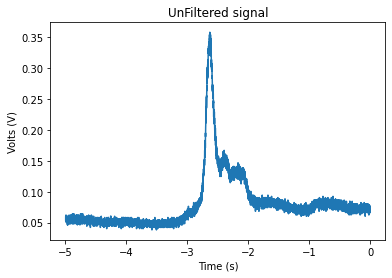

In [13]:
from scipy.signal import filtfilt
from scipy import stats
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy


plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 18})

scope_num = 1
lab_num = 1
filename = f'data/Lab_{lab_num}/scope_{scope_num}.csv'
df = pd.read_csv(filename)

sensor_data = df[['channel_2']]

sensor_data = np.array(sensor_data)
time = np.array(df['x_axis'])

plt.plot(time, sensor_data)
plt.xlabel('Time (s)')
plt.ylabel('Volts (V)')
plt.title('UnFiltered signal')
plt.show()


In [14]:
def band_pass_filter(signal):

    # Sampling Rate of data
    fs = len(signal) / 5

    # Range for filter
    lowcut = 0.01 # Tends to control how 'flat' the ends are
    highcut = 5 # Tends to control how much the graph resembles the original graph (higher = closer to original)

    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq

    order=2

    b,a = scipy.signal.butter(order,[low,high], 'bandpass', analog=False)
    y = scipy.signal.filtfilt(b,a,signal,axis=0)

    return(y)


<ipython-input-15-82b14db430d3>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(time, sensor_data, color='k', LineWidth=2, label="Unfiltered Signal")
<ipython-input-15-82b14db430d3>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(time, filtered_signal, color='b', LineWidth=2, label="Filtered Signal")


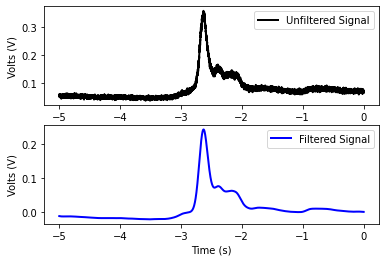

In [15]:


fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(time, sensor_data, color='k', LineWidth=2, label="Unfiltered Signal")
plt.xlabel('Time (s)')
plt.ylabel('Volts (V)')
plt.legend()

plt.sca(axs[1])
filtered_signal = band_pass_filter(sensor_data)
plt.plot(time, filtered_signal, color='b', LineWidth=2, label="Filtered Signal")
plt.xlabel('Time (s)')
plt.ylabel('Volts (V)')
plt.legend()

# save raw scope as png in data/Plots/Lab_<lab_num>/Spectrograms
image_path = f'data/Plots/Lab_{lab_num}/Bandpass_filtered_plots/scope_{scope_num}.png'
plt.savefig(image_path, dpi=900, bbox_inches='tight', transparent=False)

